In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [3]:
df=pd.read_csv('data.csv',encoding='unicode_escape')

In [4]:
df.head()

stn_code       sampling_date           state   location agency  \
0      150  February - M021990  Andhra Pradesh  Hyderabad    NaN   
1      151  February - M021990  Andhra Pradesh  Hyderabad    NaN   
2      152  February - M021990  Andhra Pradesh  Hyderabad    NaN   
3      150     March - M031990  Andhra Pradesh  Hyderabad    NaN   
4      151     March - M031990  Andhra Pradesh  Hyderabad    NaN   

                                 type  so2   no2  rspm  spm  \
0  Residential, Rural and other Areas  4.8  17.4   NaN  NaN   
1                     Industrial Area  3.1   7.0   NaN  NaN   
2  Residential, Rural and other Areas  6.2  28.5   NaN  NaN   
3  Residential, Rural and other Areas  6.3  14.7   NaN  NaN   
4                     Industrial Area  4.7   7.5   NaN  NaN   

  location_monitoring_station  pm2_5        date  
0                         NaN    NaN  1990-02-01  
1                         NaN    NaN  1990-02-01  
2                         NaN    NaN  1990-02-01  
3                         NaN    NaN  1990-03-01  
4                         NaN    NaN  1990-03-01

In [5]:
df.shape

(435742, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
stn_code                       291665 non-null object
sampling_date                  435739 non-null object
state                          435742 non-null object
location                       435739 non-null object
agency                         286261 non-null object
type                           430349 non-null object
so2                            401096 non-null float64
no2                            419509 non-null float64
rspm                           395520 non-null float64
spm                            198355 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          9314 non-null float64
date                           435735 non-null object
dtypes: float64(5), object(8)
memory usage: 43.2+ MB


In [7]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [8]:
df.describe()

so2            no2           rspm            spm        pm2_5
count  401096.000000  419509.000000  395520.000000  198355.000000  9314.000000
mean       10.829414      25.809623     108.832784     220.783480    40.791467
std        11.177187      18.503086      74.872430     151.395457    30.832525
min         0.000000       0.000000       0.000000       0.000000     3.000000
25%         5.000000      14.000000      56.000000     111.000000    24.000000
50%         8.000000      22.000000      90.000000     187.000000    32.000000
75%        13.700000      32.200000     142.000000     296.000000    46.000000
max       909.000000     876.000000    6307.033333    3380.000000   504.000000

In [9]:
df.nunique()

stn_code                        803
sampling_date                  5485
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

In [10]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

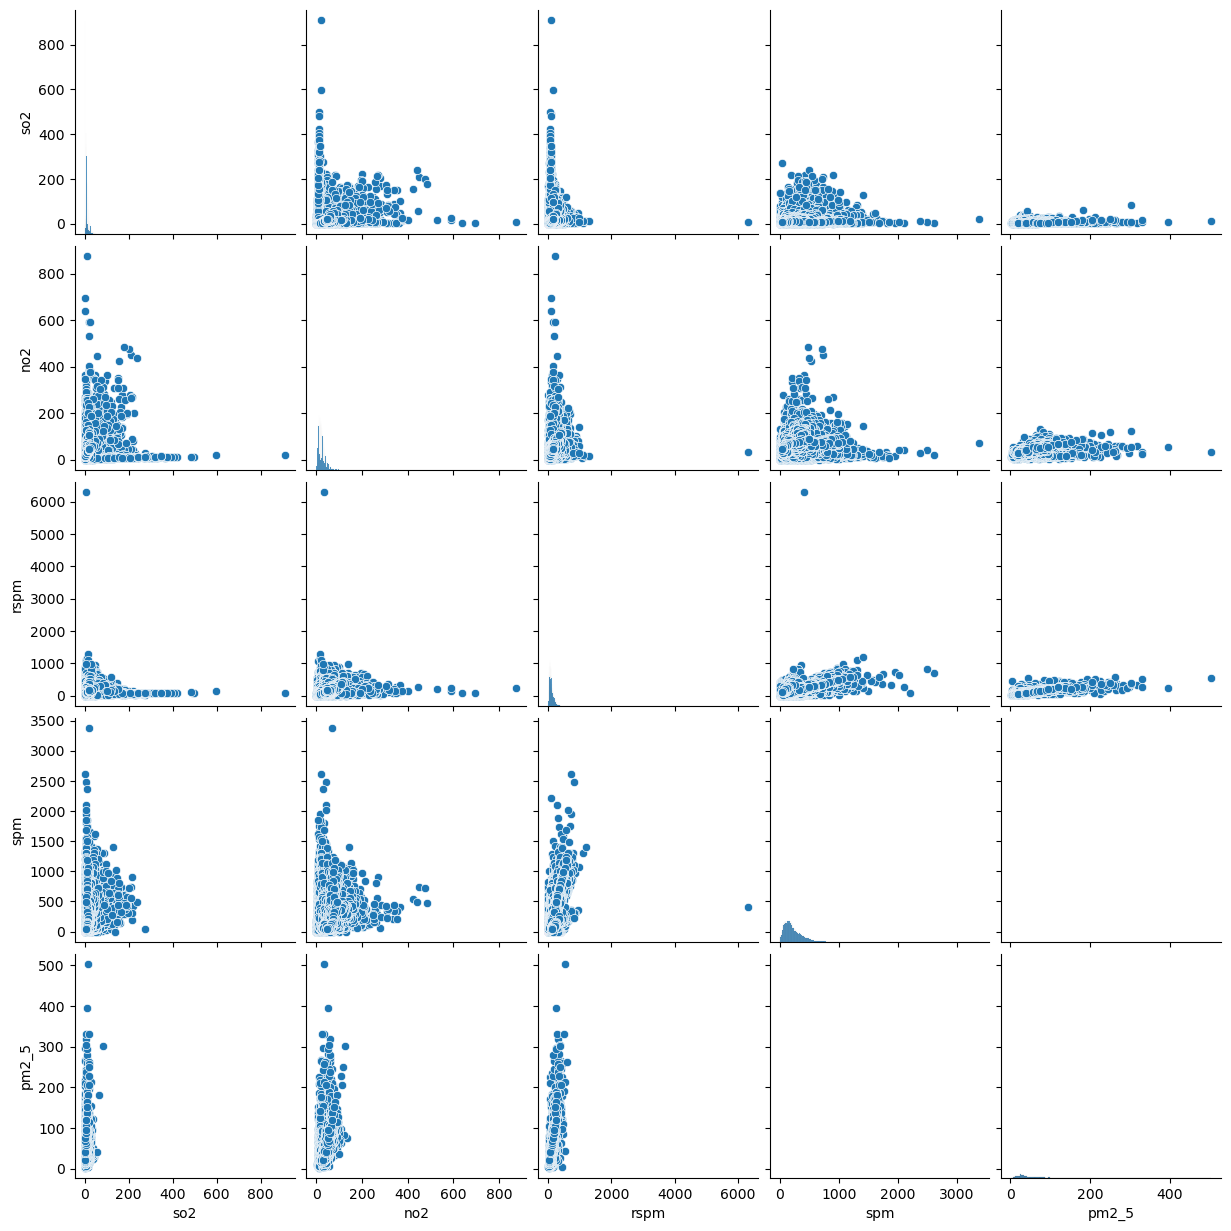

In [11]:
sns.pairplot(data=df)

In [12]:
df['state'].value_counts()

Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                      17119
Delhi                           8551
Chandigarh                      8520
Chhattisgarh                    7831
Goa                             6206
Jharkhand                       5968
Mizoram                         5338
Telangana                       3978
Meghalaya                       3853
Puducherry                      3785
Haryana                         3420
Nagaland                        2463
Bihar                           2275
Uttarakhand                     1961
J

[]

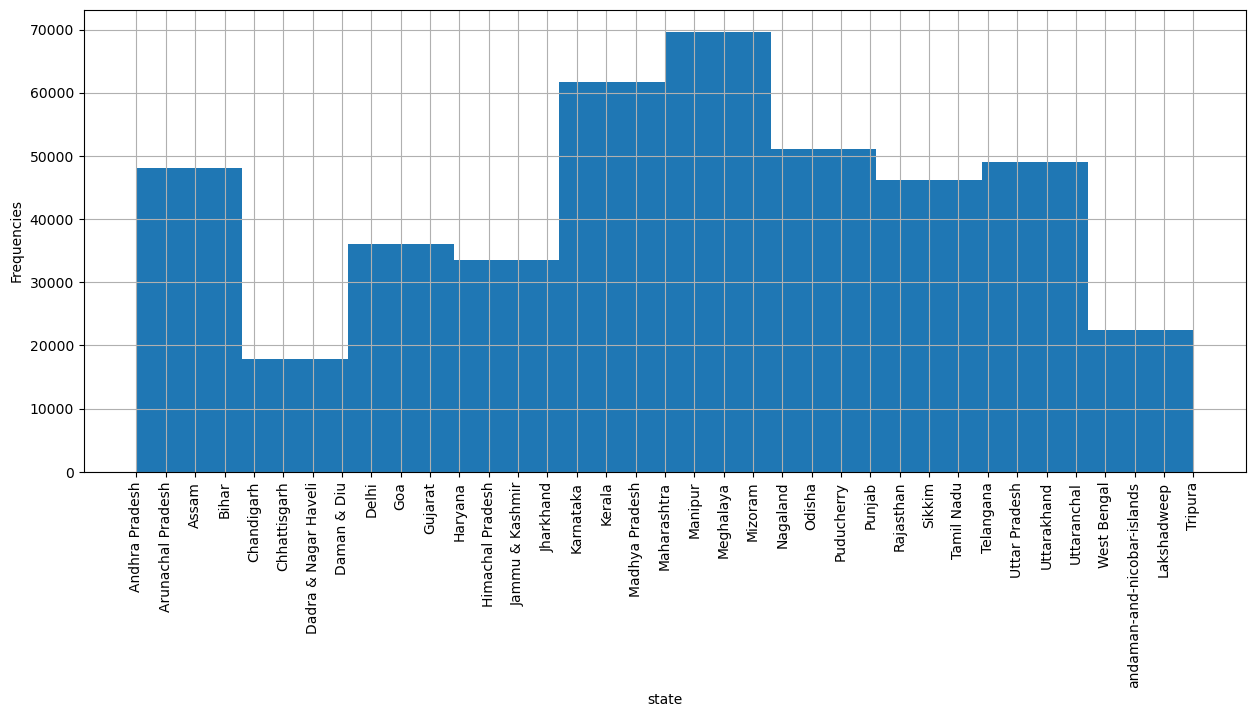

In [13]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.state.hist()
plt.xlabel('state')
plt.ylabel('Frequencies')
plt.plot()

In [14]:
df['type'].value_counts()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

[]

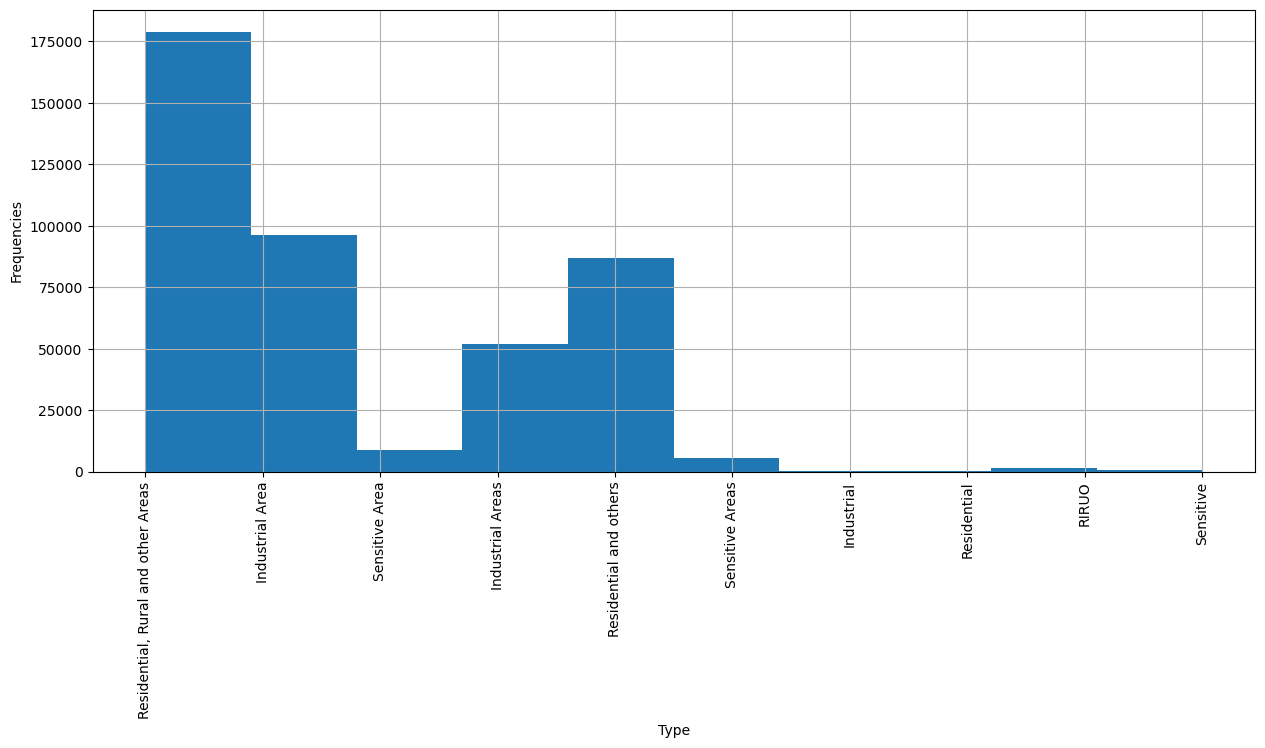

In [15]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.type.hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.plot()

In [16]:
df['agency'].value_counts()

Maharashtra State Pollution Control Board                                 27857
Uttar Pradesh State Pollution Control Board                               22686
Andhra Pradesh State Pollution Control Board                              19139
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Punjab State Pollution Control Board                                      15232
                                                                          ...  
Arunachal Pradesh State Pollution Control Board                              90
TNPC                                                                         82
RPCB                                                                         63
VRCE                                                                         61
RJPB                                                                         53
Name: agency, Length: 64, dtype: int64

[]

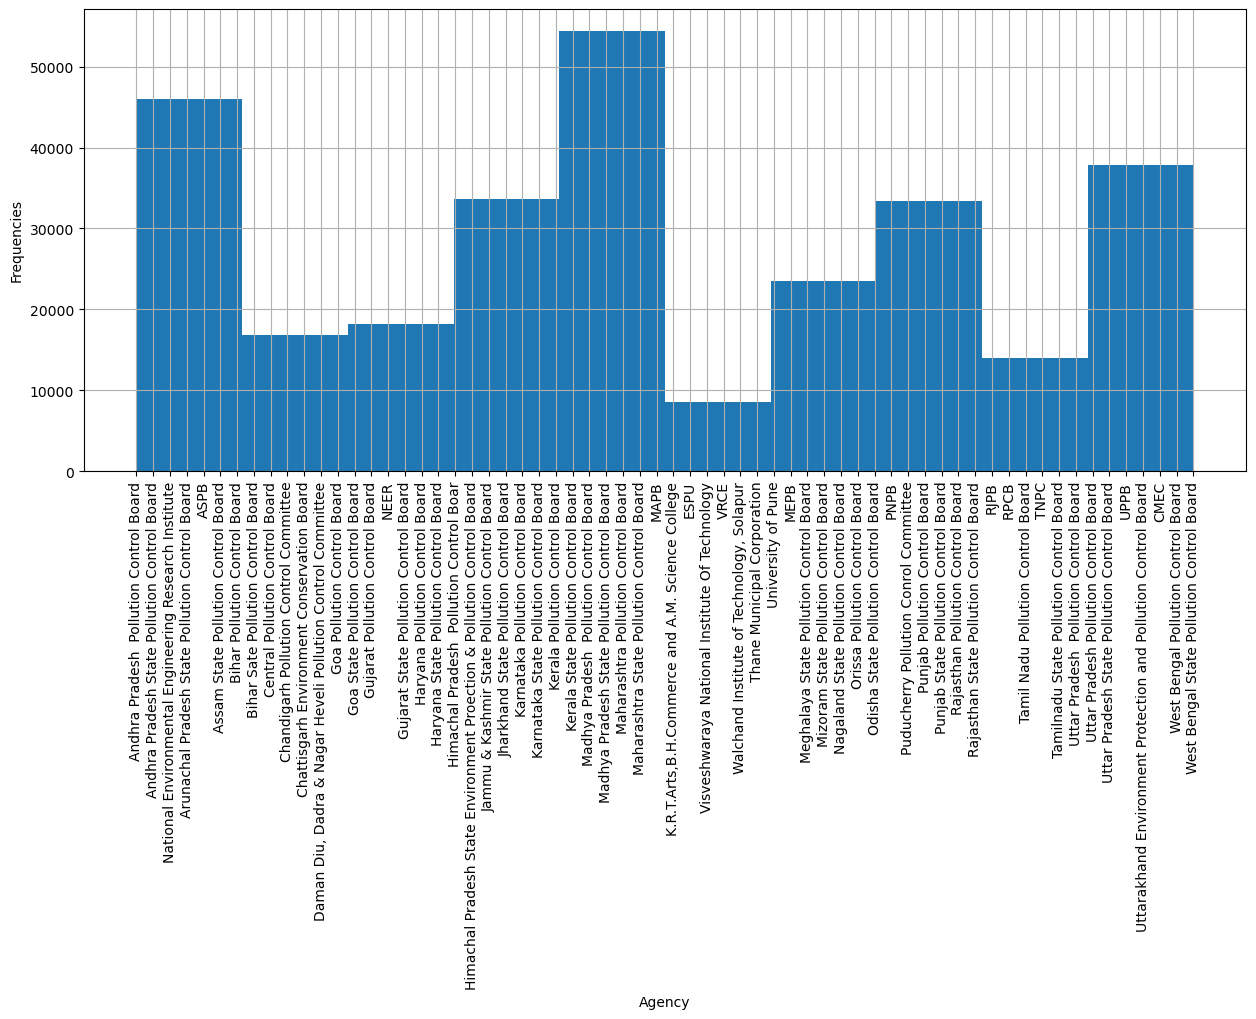

In [17]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.agency.hist()
plt.xlabel('Agency')
plt.ylabel('Frequencies')
plt.plot()

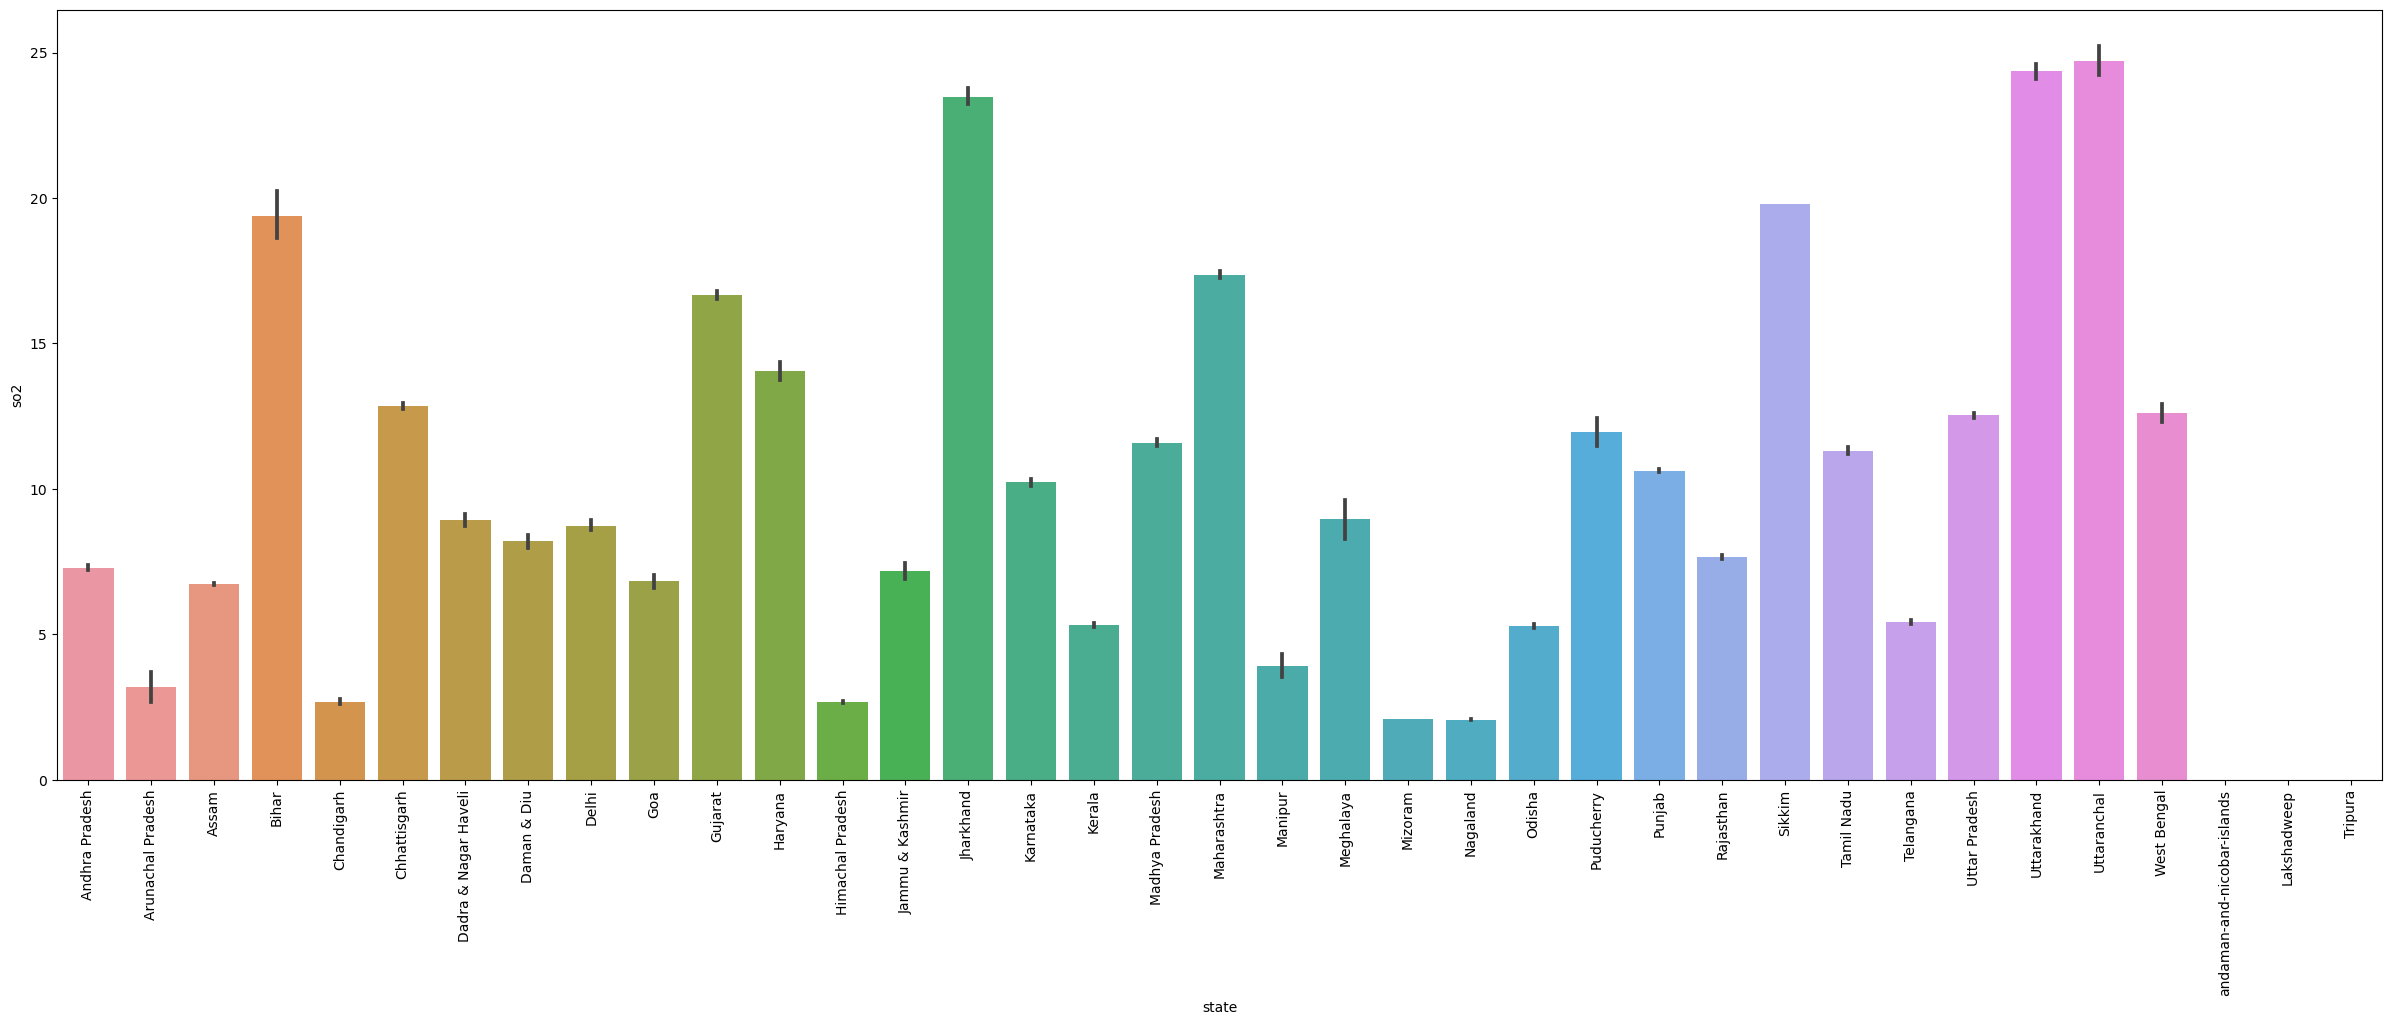

In [18]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='so2',data=df);

In [19]:
plt.rcParams['figure.figsize']=(30,10)

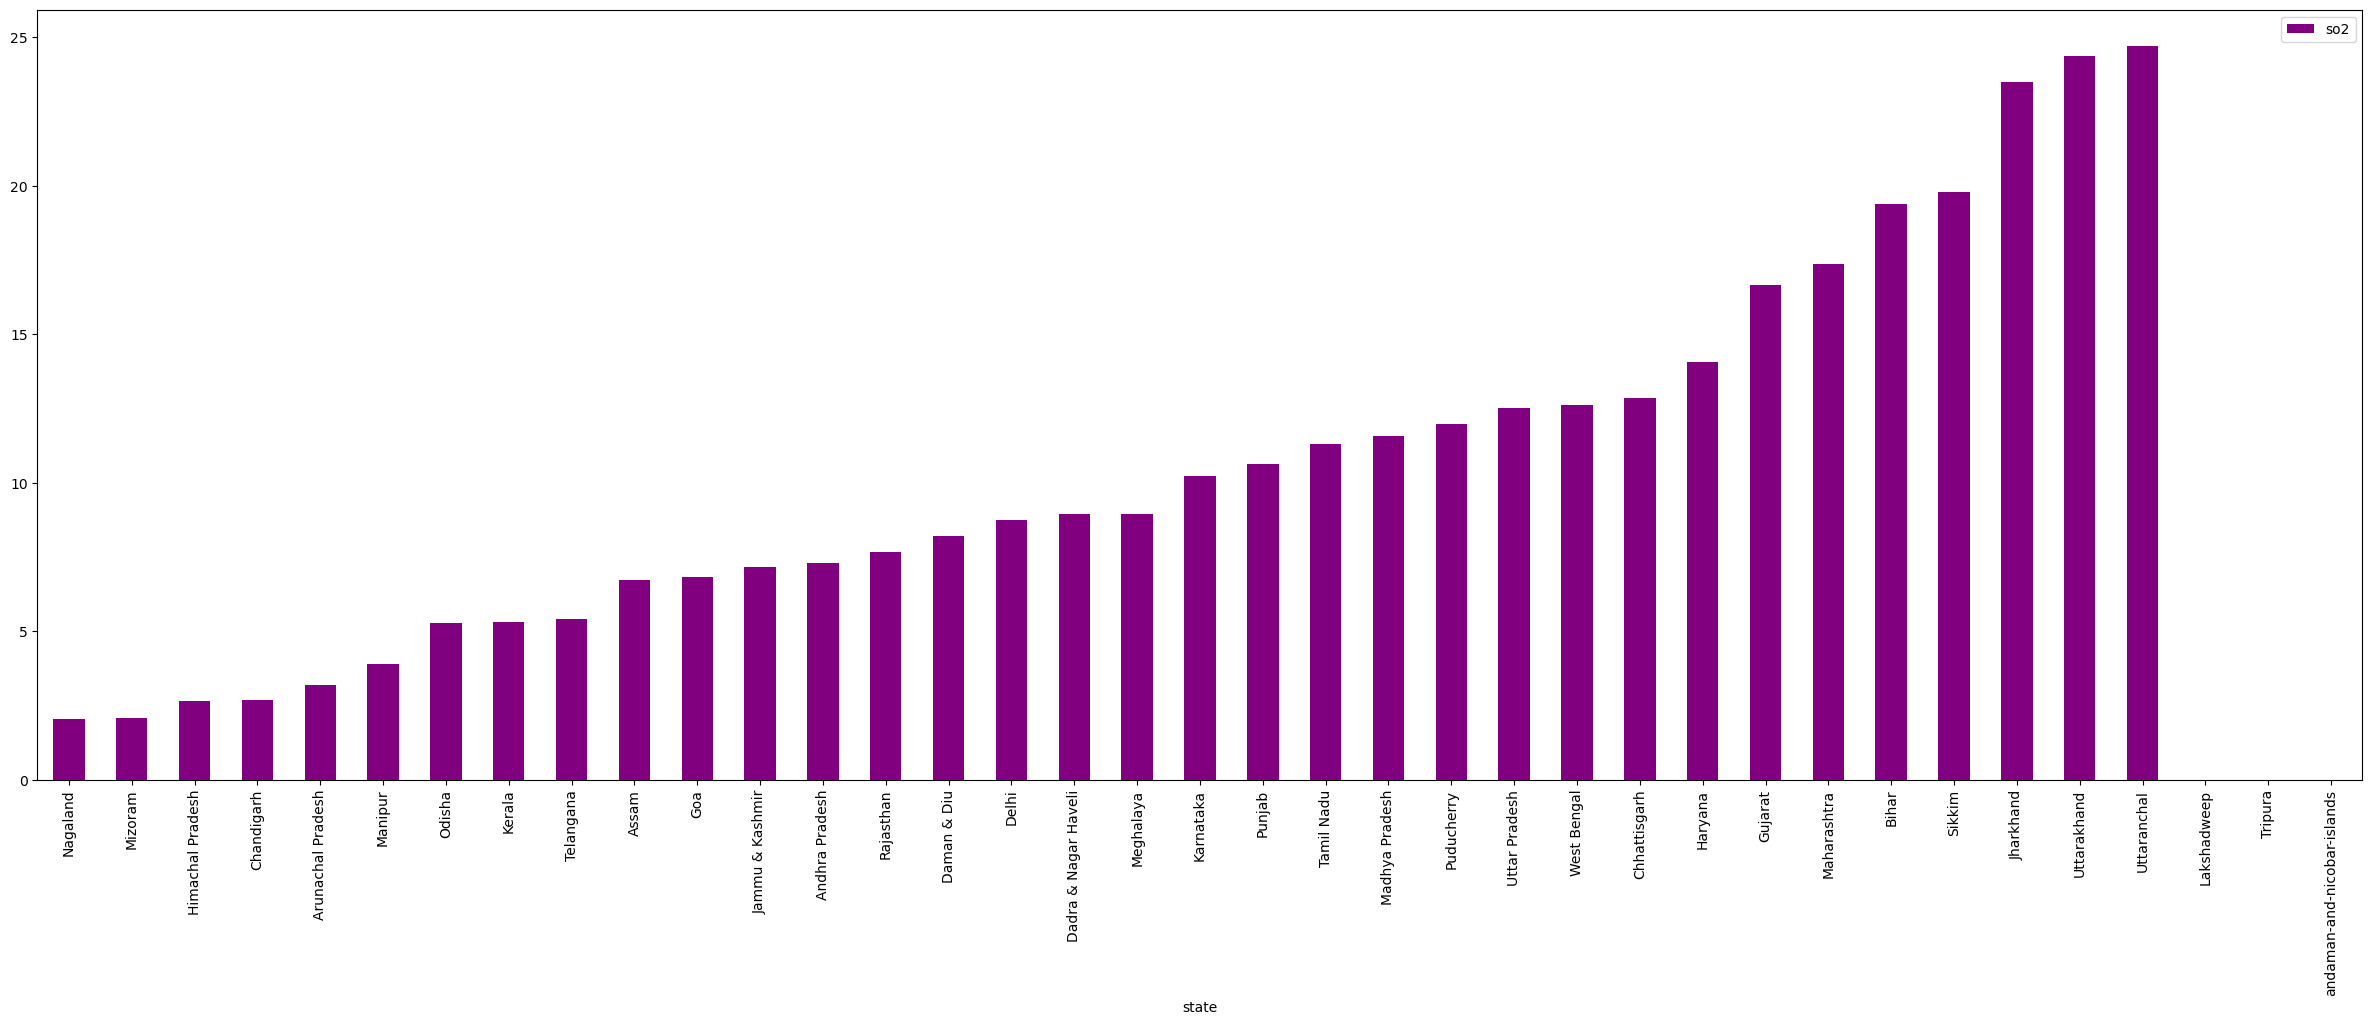

In [20]:
df[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').plot.bar(color='purple')
plt.show()

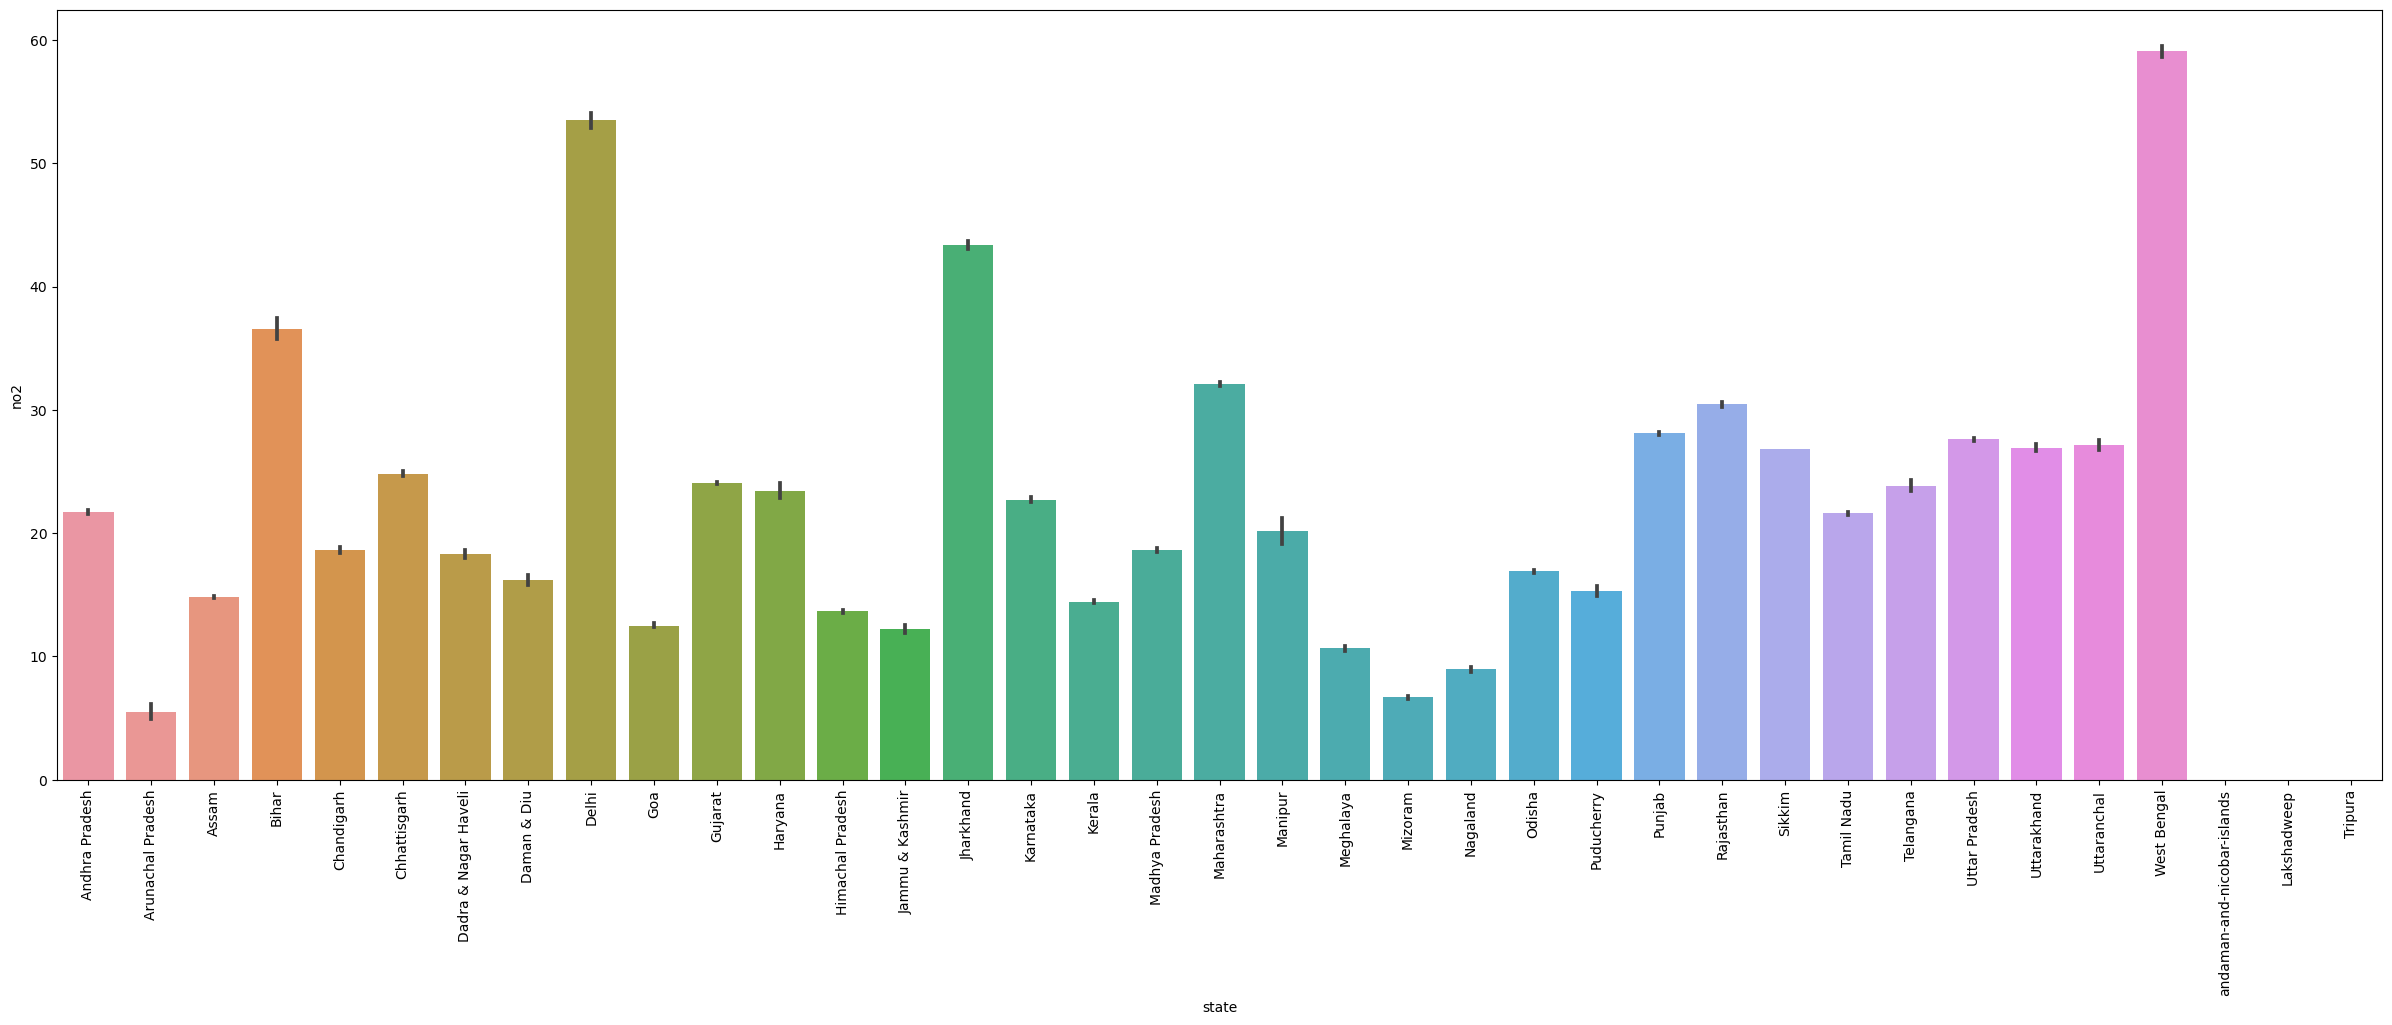

In [21]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='no2',data=df);

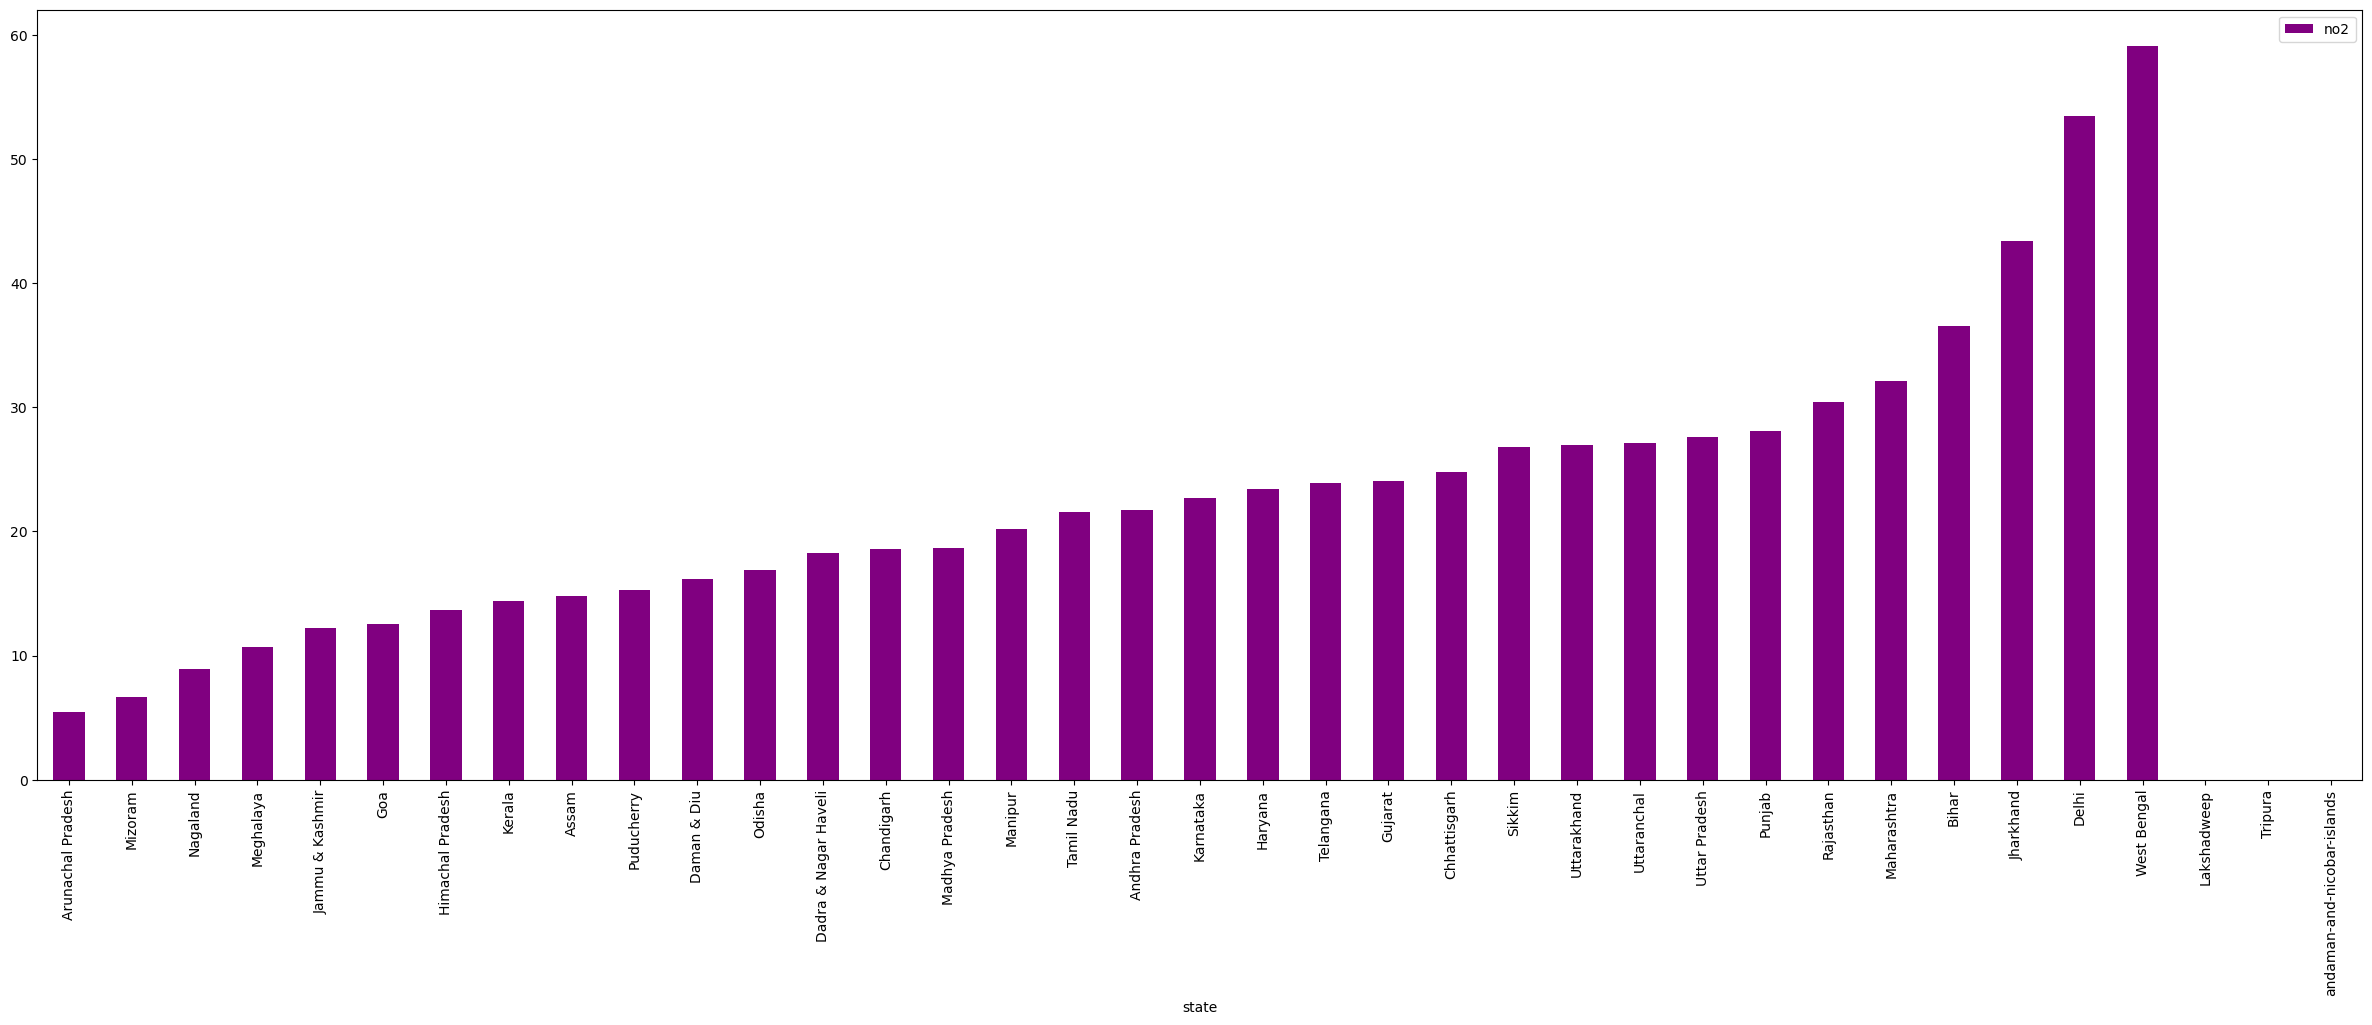

In [22]:
df[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='purple')
plt.show()

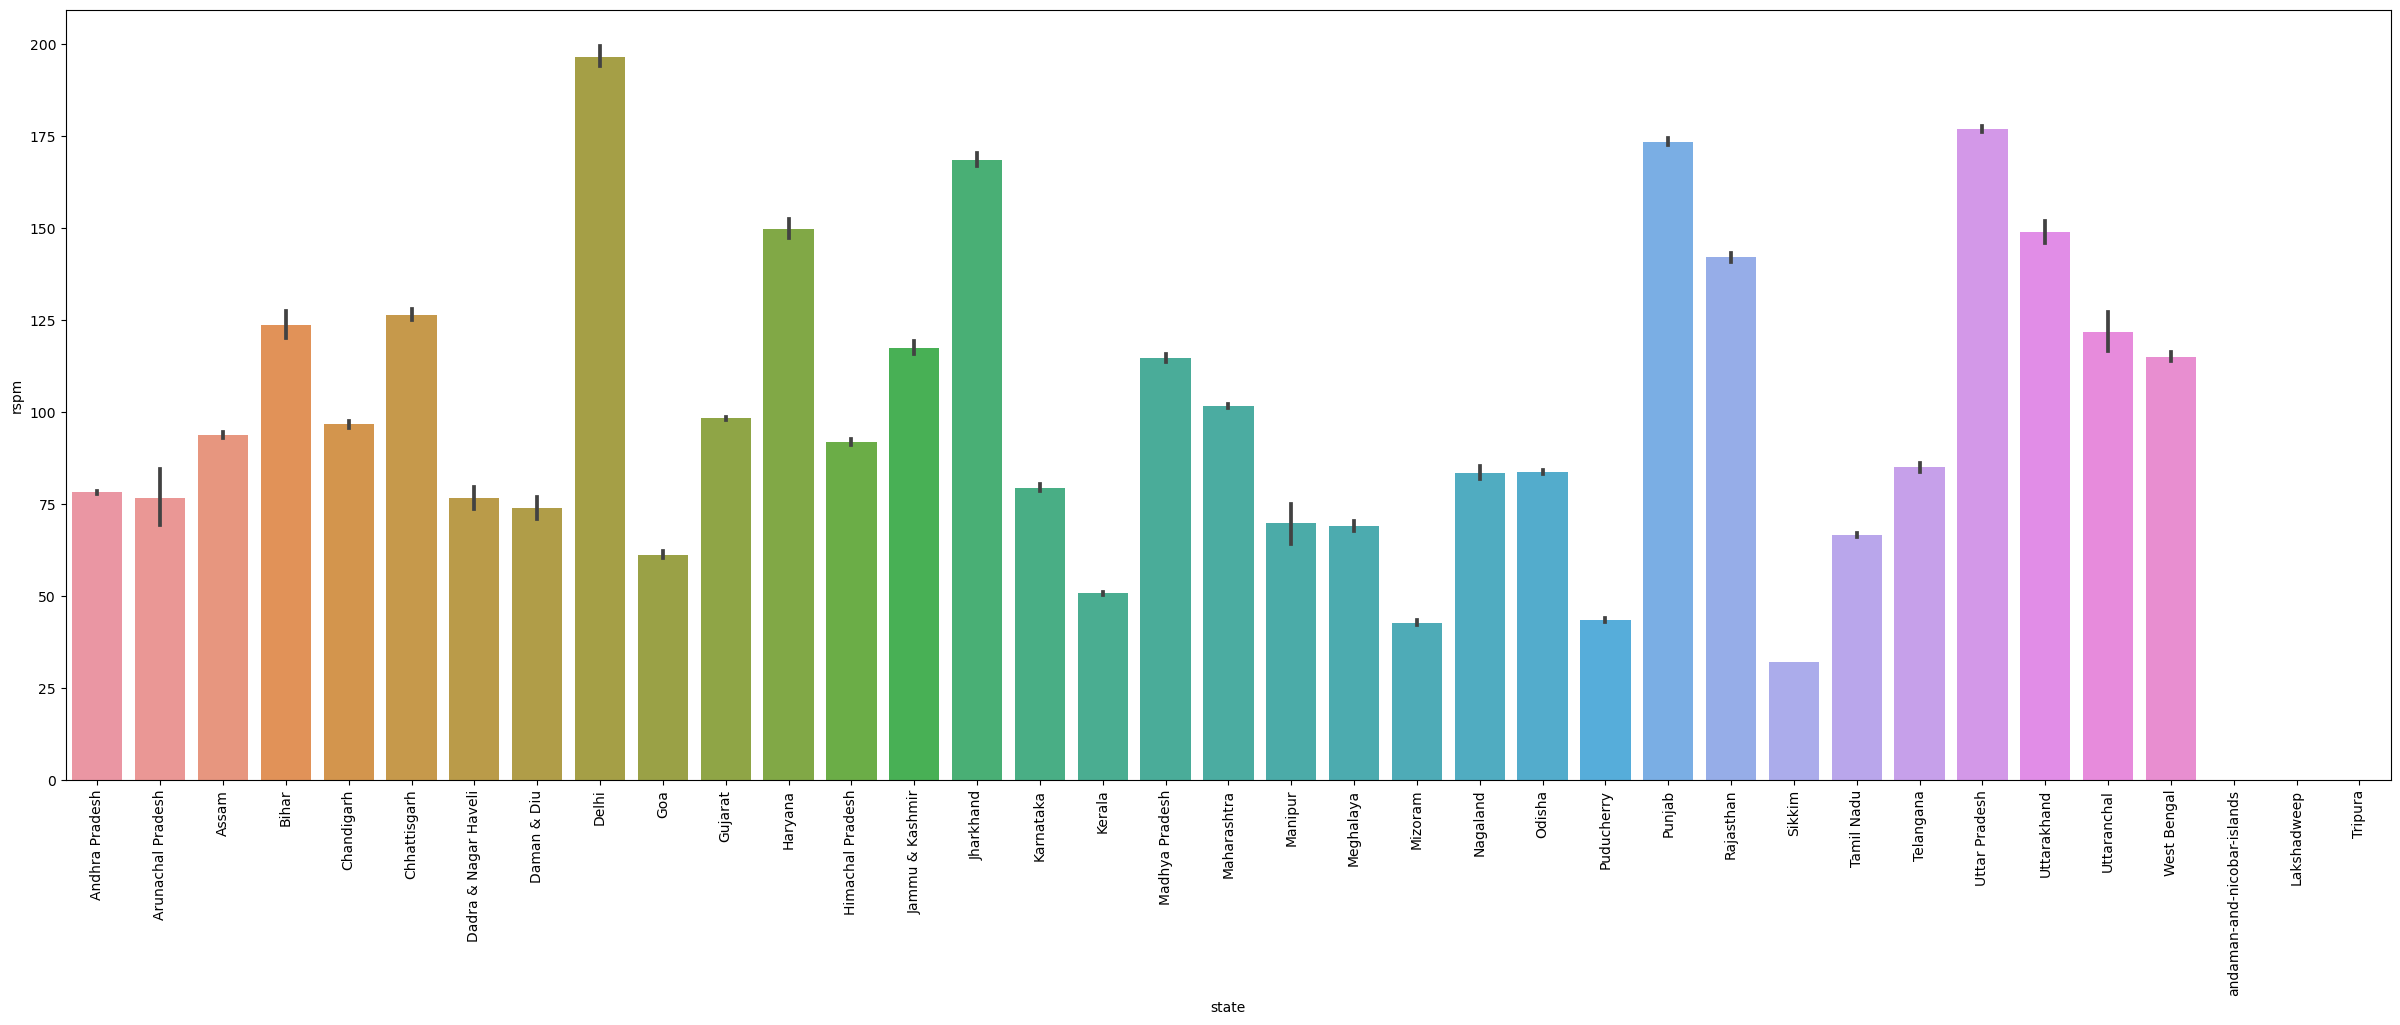

In [23]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='rspm',data=df);

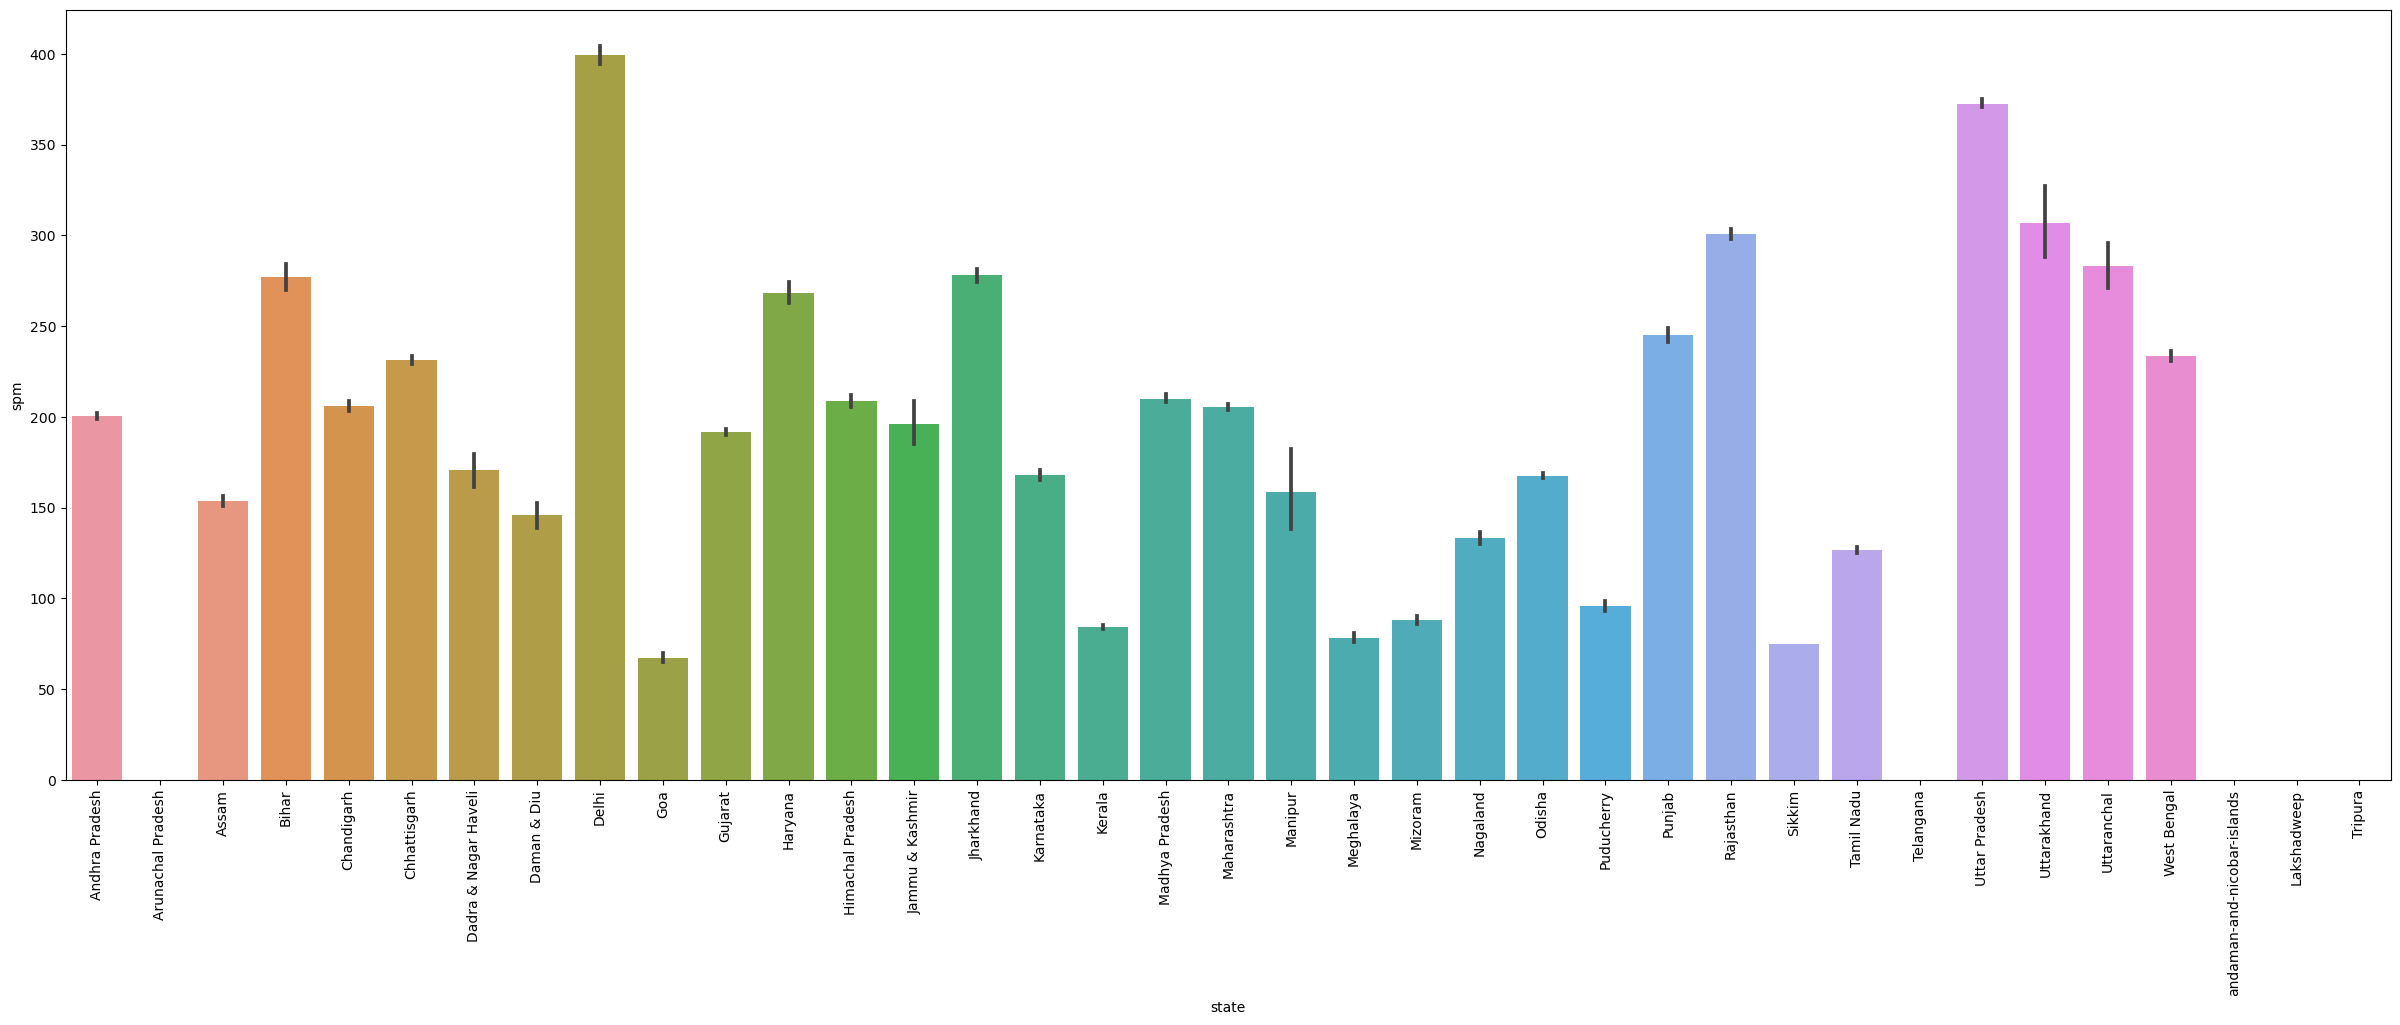

In [24]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='spm',data=df);

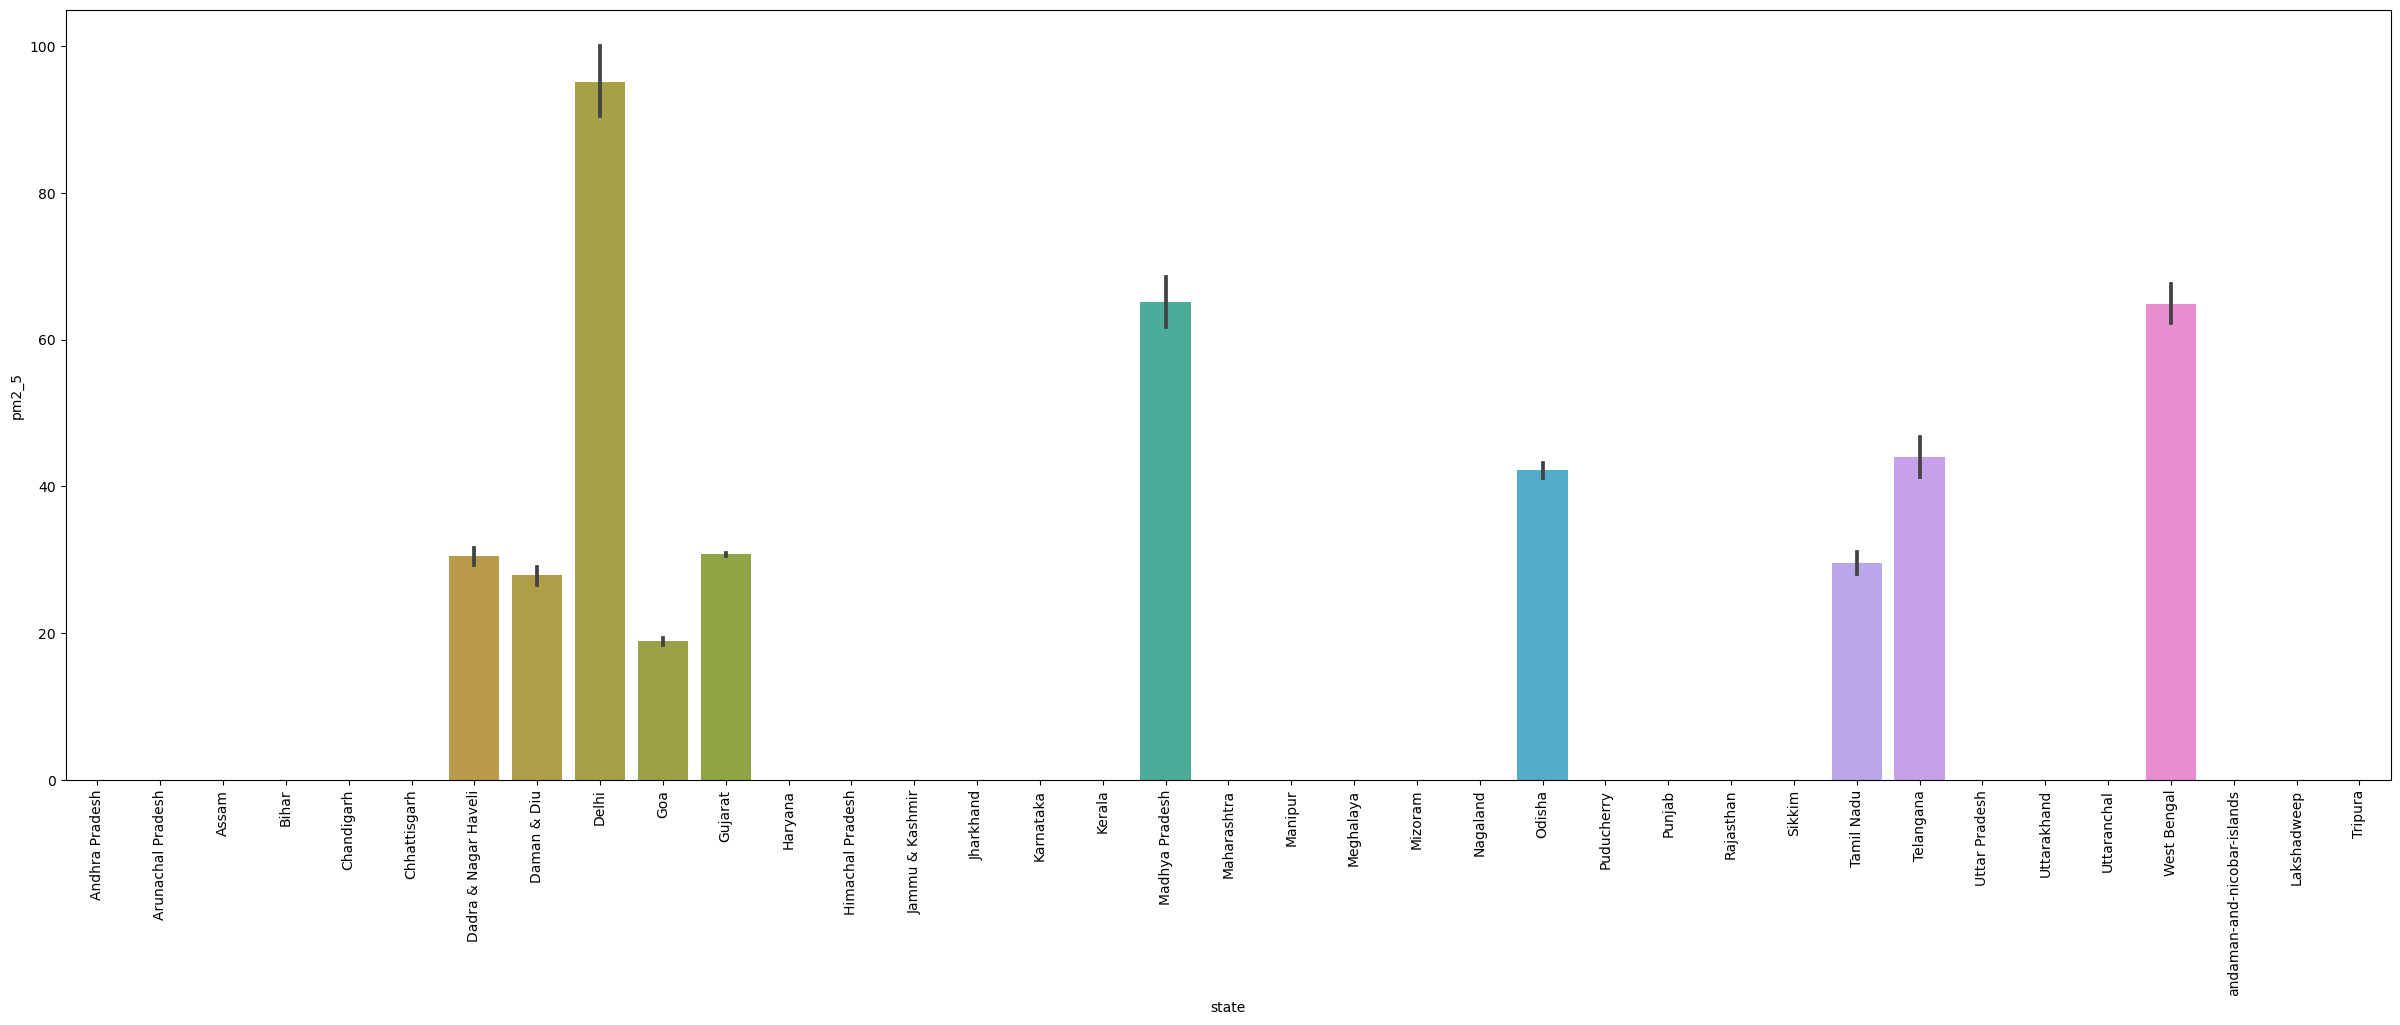

In [25]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='pm2_5',data=df);

In [26]:
pollution_data = df.groupby('state')[['so2', 'no2', 'rspm', 'spm', 'pm2_5']].mean().reset_index()

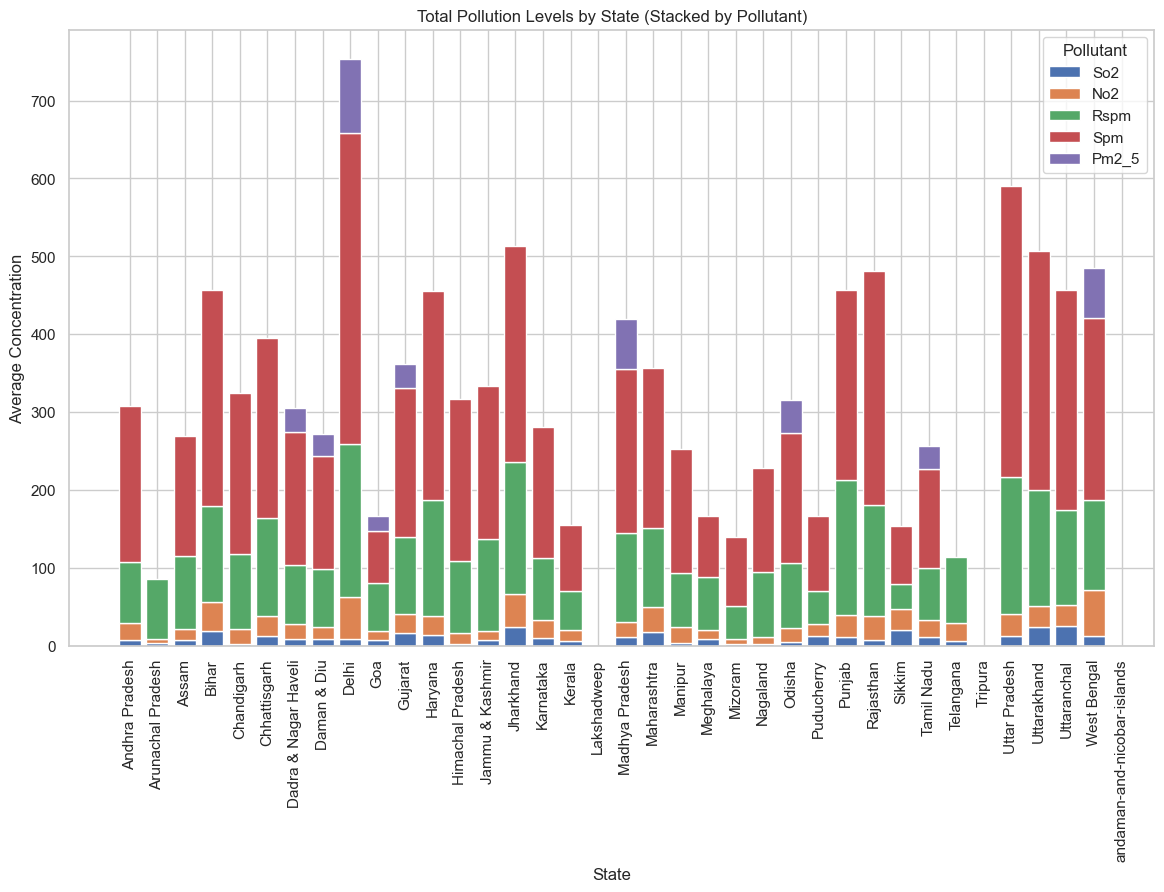

In [27]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(14, 8))

# Create a stacked bar plot
# Bottom parameter tracks where the current bar should start in height
bottom = None
for pollutant in ['so2', 'no2', 'rspm', 'spm', 'pm2_5']:
    plt.bar(pollution_data['state'], pollution_data[pollutant], bottom=bottom, label=pollutant.capitalize())
    if bottom is None:
        bottom = pollution_data[pollutant]
    else:
        bottom += pollution_data[pollutant]

plt.title('Total Pollution Levels by State (Stacked by Pollutant)')
plt.xticks(rotation=90)  # Rotate state names for better visibility
plt.ylabel('Average Concentration')
plt.xlabel('State')
plt.legend(title='Pollutant')

# Show the plot
plt.show()

In [28]:
nullvalues = df.isnull().sum().sort_values(ascending=False)

In [29]:
nullvalues

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
location                            3
sampling_date                       3
state                               0
dtype: int64

In [30]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [31]:
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percent'])

In [32]:
missing_data_with_percentage

Total    Percent
pm2_5                        426428  97.862497
spm                          237387  54.478797
agency                       149481  34.304933
stn_code                     144077  33.064749
rspm                          40222   9.230692
so2                           34646   7.951035
location_monitoring_station   27491   6.309009
no2                           16233   3.725370
type                           5393   1.237659
date                              7   0.001606
location                          3   0.000688
sampling_date                     3   0.000688
state                             0   0.000000

In [33]:
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)

In [34]:
df.isnull().sum()

state            0
location         3
type          5393
so2          34646
no2          16233
rspm         40222
spm         237387
pm2_5       426428
dtype: int64

In [35]:
df

state   location  \
0                    Andhra Pradesh  Hyderabad   
1                    Andhra Pradesh  Hyderabad   
2                    Andhra Pradesh  Hyderabad   
3                    Andhra Pradesh  Hyderabad   
4                    Andhra Pradesh  Hyderabad   
...                             ...        ...   
435737                  West Bengal   ULUBERIA   
435738                  West Bengal   ULUBERIA   
435739  andaman-and-nicobar-islands        NaN   
435740                  Lakshadweep        NaN   
435741                      Tripura        NaN   

                                      type   so2   no2   rspm  spm  pm2_5  
0       Residential, Rural and other Areas   4.8  17.4    NaN  NaN    NaN  
1                          Industrial Area   3.1   7.0    NaN  NaN    NaN  
2       Residential, Rural and other Areas   6.2  28.5    NaN  NaN    NaN  
3       Residential, Rural and other Areas   6.3  14.7    NaN  NaN    NaN  
4                          Industrial Area   4.7   7.5    NaN  NaN    NaN  
...                                    ...   ...   ...    ...  ...    ...  
435737                               RIRUO  22.0  50.0  143.0  NaN    NaN  
435738                               RIRUO  20.0  46.0  171.0  NaN    NaN  
435739                                 NaN   NaN   NaN    NaN  NaN    NaN  
435740                                 NaN   NaN   NaN    NaN  NaN    NaN  
435741                                 NaN   NaN   NaN    NaN  NaN    NaN  

[435742 rows x 8 columns]

In [36]:
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])

In [37]:
df.fillna(0, inplace=True)

In [38]:
df.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
dtype: int64

In [39]:
df

state   location  \
0                    Andhra Pradesh  Hyderabad   
1                    Andhra Pradesh  Hyderabad   
2                    Andhra Pradesh  Hyderabad   
3                    Andhra Pradesh  Hyderabad   
4                    Andhra Pradesh  Hyderabad   
...                             ...        ...   
435737                  West Bengal   ULUBERIA   
435738                  West Bengal   ULUBERIA   
435739  andaman-and-nicobar-islands   Guwahati   
435740                  Lakshadweep   Guwahati   
435741                      Tripura   Guwahati   

                                      type   so2   no2   rspm  spm  pm2_5  
0       Residential, Rural and other Areas   4.8  17.4    0.0  0.0    0.0  
1                          Industrial Area   3.1   7.0    0.0  0.0    0.0  
2       Residential, Rural and other Areas   6.2  28.5    0.0  0.0    0.0  
3       Residential, Rural and other Areas   6.3  14.7    0.0  0.0    0.0  
4                          Industrial Area   4.7   7.5    0.0  0.0    0.0  
...                                    ...   ...   ...    ...  ...    ...  
435737                               RIRUO  22.0  50.0  143.0  0.0    0.0  
435738                               RIRUO  20.0  46.0  171.0  0.0    0.0  
435739  Residential, Rural and other Areas   0.0   0.0    0.0  0.0    0.0  
435740  Residential, Rural and other Areas   0.0   0.0    0.0  0.0    0.0  
435741  Residential, Rural and other Areas   0.0   0.0    0.0  0.0    0.0  

[435742 rows x 8 columns]

In [40]:
def cal_SOi(so2):
    """
    Calculate the Air Quality Sub-Index for SO2 based on concentration.

    Breakpoints and their rationale:
    - 0-40: Good air quality; minimal impact.
    - 41-80: Moderate air quality; acceptable but may pose a risk to some individuals.
    - 81-380: Unhealthy for sensitive groups.
    - 381-800: Unhealthy; everyone may begin to experience health effects.
    - 801-1600: Very unhealthy; health warnings of emergency conditions.
    - >1600: Hazardous; entire population is likely to be affected.
    """
    si = 0
    if so2 <= 40:
        si = so2 * (50/40)  # Scale up to 50 for good air quality upper limit
    elif so2 <= 80:
        si = 50 + (so2 - 40) * (50 / 40)  # Scale from 50 to 100 for moderate air quality
    elif so2 <= 380:
        si = 100 + (so2 - 80) * (100 / 300)  # Scale from 100 to 200 over this range
    elif so2 <= 800:
        si = 200 + (so2 - 380) * (100 / 420)  # Scale from 200 to 300
    elif so2 <= 1600:
        si = 300 + (so2 - 800) * (100 / 800)  # Scale from 300 to 400
    elif so2 > 1600:
        si = 400 + (so2 - 1600) * (100 / 800)  # Scale beyond 400 for hazardous conditions
    return si

# Apply the function to the DataFrame and display the first few rows of data
df['SOi'] = df['so2'].apply(cal_SOi)
data = df[['so2', 'SOi']]
data.head()


so2    SOi
0  4.8  6.000
1  3.1  3.875
2  6.2  7.750
3  6.3  7.875
4  4.7  5.875

In [41]:
def cal_Noi(no2):
    """
    Calculate the Air Quality Sub-Index for NO2 based on concentration.
    
    Breakpoints and their rationale:
    - 0-40: Good air quality; minimal impact.
    - 41-80: Moderate air quality; acceptable but may pose a risk to some individuals.
    - 81-180: Unhealthy for sensitive groups.
    - 181-280: Unhealthy; everyone may begin to experience health effects.
    - 281-400: Very unhealthy; health warnings of emergency conditions.
    - >400: Hazardous; entire population is likely to be affected.
    """
    ni = 0
    if no2 <= 40:
        ni = no2 * (50 / 40)  # Scale to 50 for the upper good quality limit
    elif no2 <= 80:
        ni = 50 + (no2 - 40) * (50 / 40)  # From 50 to 100 for moderate air quality
    elif no2 <= 180:
        ni = 100 + (no2 - 80) * (100 / 100)  # From 100 to 200 for the sensitive groups
    elif no2 <= 280:
        ni = 200 + (no2 - 180) * (100 / 100)  # From 200 to 300 for unhealthy air quality
    elif no2 <= 400:
        ni = 300 + (no2 - 280) * (100 / 120)  # From 300 to 400 for very unhealthy conditions
    else:
        ni = 400 + (no2 - 400) * (100 / 120)  # Beyond 400 for hazardous conditions

    return ni

# Apply the function to the DataFrame and display the first few rows of data
df['Noi'] = df['no2'].apply(cal_Noi)
data = df[['no2', 'Noi']]
data.head()


no2     Noi
0  17.4  21.750
1   7.0   8.750
2  28.5  35.625
3  14.7  18.375
4   7.5   9.375

In [42]:
def cal_RSPMI(rspm):
    """Breakpoints and rationale:
    - 0-30: Good air quality; minimal impact on health.
    - 31-60: Moderate air quality; acceptable but may be a concern for individuals with lung disease.
    - 61-90: Unhealthy for sensitive groups including the elderly and children.
    - 91-120: Unhealthy; can affect all individuals.
    - 121-250: Very unhealthy; serious impact on health.
    - >250: Hazardous; emergency conditions as health warnings are issued."""
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
df['Rpi']=df['rspm'].apply(cal_RSPMI)
data= df[['rspm','Rpi']]
data.head()

rspm  Rpi
0   0.0  0.0
1   0.0  0.0
2   0.0  0.0
3   0.0  0.0
4   0.0  0.0

In [43]:
def cal_SPMi(spm):
    spi=0
    """Breakpoints and their rationale:
    - 0-50: Good air quality; minimal impact.
    - 51-100: Moderate air quality; acceptable but may pose a risk to sensitive individuals.
    - 101-250: Unhealthy for sensitive groups.
    - 251-350: Unhealthy; everyone may begin to experience more serious health effects.
    - 351-430: Very unhealthy; health alerts are issued.
    - >430: Hazardous; emergency conditions with serious health effects.
    """
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
   
df['SPMi']=df['spm'].apply(cal_SPMi)
data= df[['spm','SPMi']]
data.head()

spm  SPMi
0  0.0   0.0
1  0.0   0.0
2  0.0   0.0
3  0.0   0.0
4  0.0   0.0

In [44]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)
data= df[['state','SOi','Noi','Rpi','SPMi','AQI']]
data.head()

state    SOi     Noi  Rpi  SPMi     AQI
0  Andhra Pradesh  6.000  21.750  0.0   0.0  21.750
1  Andhra Pradesh  3.875   8.750  0.0   0.0   8.750
2  Andhra Pradesh  7.750  35.625  0.0   0.0  35.625
3  Andhra Pradesh  7.875  18.375  0.0   0.0  18.375
4  Andhra Pradesh  5.875   9.375  0.0   0.0   9.375

In [45]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df.head()

state   location                                type  so2   no2  \
0  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  4.8  17.4   
1  Andhra Pradesh  Hyderabad                     Industrial Area  3.1   7.0   
2  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  6.2  28.5   
3  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  6.3  14.7   
4  Andhra Pradesh  Hyderabad                     Industrial Area  4.7   7.5   

   rspm  spm  pm2_5    SOi     Noi  Rpi  SPMi     AQI AQI_Range  
0   0.0  0.0    0.0  6.000  21.750  0.0   0.0  21.750      Good  
1   0.0  0.0    0.0  3.875   8.750  0.0   0.0   8.750      Good  
2   0.0  0.0    0.0  7.750  35.625  0.0   0.0  35.625      Good  
3   0.0  0.0    0.0  7.875  18.375  0.0   0.0  18.375      Good  
4   0.0  0.0    0.0  5.875   9.375  0.0   0.0   9.375      Good

In [46]:
df['AQI_Range'].value_counts()

Good              219643
Poor               93272
Moderate           56571
Unhealthy          31733
Hazardous          18700
Very unhealthy     15823
Name: AQI_Range, dtype: int64

In [47]:
X=df[['SOi','Noi','Rpi','SPMi']]
Y=df['AQI']
X.head()

SOi     Noi  Rpi  SPMi
0  6.000  21.750  0.0   0.0
1  3.875   8.750  0.0   0.0
2  7.750  35.625  0.0   0.0
3  7.875  18.375  0.0   0.0
4  5.875   9.375  0.0   0.0

In [48]:
Y.head()

0    21.750
1     8.750
2    35.625
3    18.375
4     9.375
Name: AQI, dtype: float64

In [49]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(348593, 4) (87149, 4) (348593,) (87149,)


# CLASSIFICATION ALGORITHM

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [51]:
X2 = df[['SOi','Noi','Rpi','SPMi']]
Y2 = df['AQI_Range']

In [52]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.33, random_state=70)

# LOGISTIC REGRESSION

In [53]:
#fit the model on train data 
log_reg = LogisticRegression().fit(X_train2, Y_train2)

#predict on train 
train_preds2 = log_reg.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds2))

#predict on test
test_preds2 = log_reg.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds2))
print('-'*50)

# Kappa Score.
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds2))

Model accuracy on train is:  0.7276012426913104
Model accuracy on test is:  0.7271254216071491
--------------------------------------------------
KappaScore is:  0.584377382981496


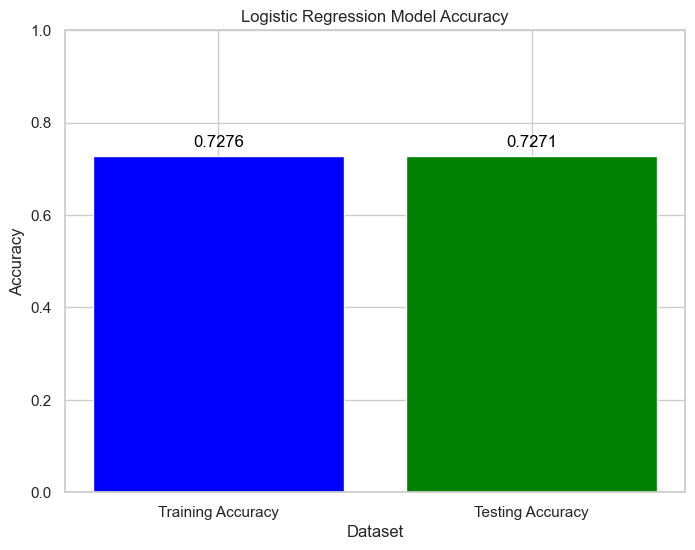

In [54]:
import matplotlib.pyplot as plt

# Example accuracy scores from your logistic regression model
accuracy_train = accuracy_score(Y_train2, train_preds2)  # Accuracy on training data
accuracy_test = accuracy_score(Y_test2, test_preds2)  # Accuracy on testing data

# Data to plot
labels = ['Training Accuracy', 'Testing Accuracy']
accuracies = [accuracy_train, accuracy_test]

# Creating the bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Model Accuracy')
plt.ylim(0, 1)  # Set y-axis limits to show percentages clearly
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center', color='black')  # Show text above the bars

# Show the plot
plt.show()


In [55]:
log_reg.predict([[727,327.55,78.2,100]])

array(['Good'], dtype=object)

In [56]:
log_reg.predict([[2.7,45,35.16,23]])

array(['Poor'], dtype=object)

In [57]:
log_reg.predict([[100,2.8,82,200]]) 

array(['Unhealthy'], dtype=object)

In [58]:
log_reg.predict([[20,45.8,37,32]])

array(['Moderate'], dtype=object)

# DECISION TREE CLASSIFIER

In [59]:
#fit the model on train data 
DT2 = DecisionTreeClassifier().fit(X_train2,Y_train2)

#predict on train 
train_preds3 = DT2.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds3))

#predict on test
test_preds3 = DT2.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds3))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds3))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9998122326923745
--------------------------------------------------
KappaScore is:  0.9997215084575858


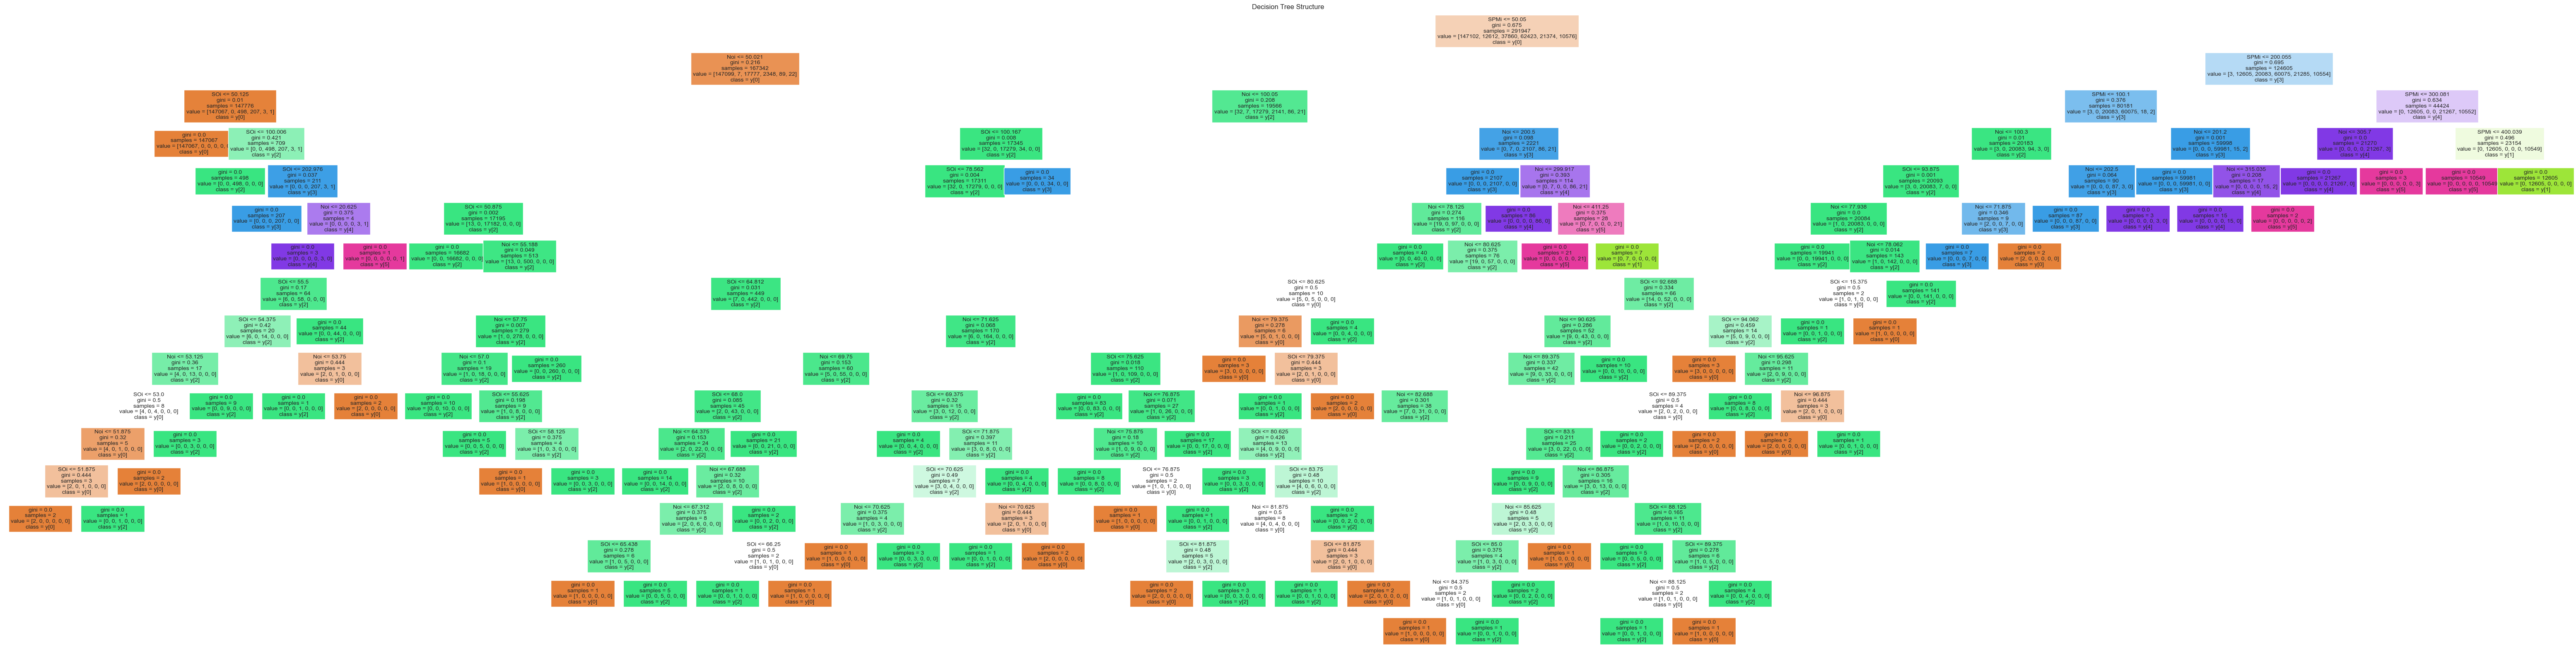

In [60]:
from sklearn.metrics import accuracy_score, cohen_kappa_score
from sklearn.tree import plot_tree
# Assuming DT2 is already fitted as shown in your setup
DT2 = DecisionTreeClassifier().fit(X_train2, Y_train2)

# Visualize the tree
plt.figure(figsize=(80,20))  # Set the size of the figure, adjust depending on the complexity of the tree
plot_tree(DT2, filled=True, feature_names=X_train2.columns, class_names=True, fontsize=10)
plt.title('Decision Tree Structure')
plt.show()

In [61]:
 DT2.predict([[7.4,47.7,78.182,100]])

array(['Moderate'], dtype=object)

In [62]:
 DT2.predict([[1,1.2,3.12,0]])

array(['Good'], dtype=object)

In [63]:
 DT2.predict([[325.7,345,798.182,203]])

array(['Very unhealthy'], dtype=object)

# Random Forest Classifier

In [64]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, cohen_kappa_score

# Fit the model on train data with specified n_estimators
RF = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train2, Y_train2)

# Predict on train
train_preds4 = RF.predict(X_train2)
# Accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds4))

# Predict on test
test_preds4 = RF.predict(X_test2)
# Accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds4))

# Kappa Score
print('KappaScore is: ', cohen_kappa_score(Y_test2, test_preds4))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9998330957265552
KappaScore is:  0.999752456690889


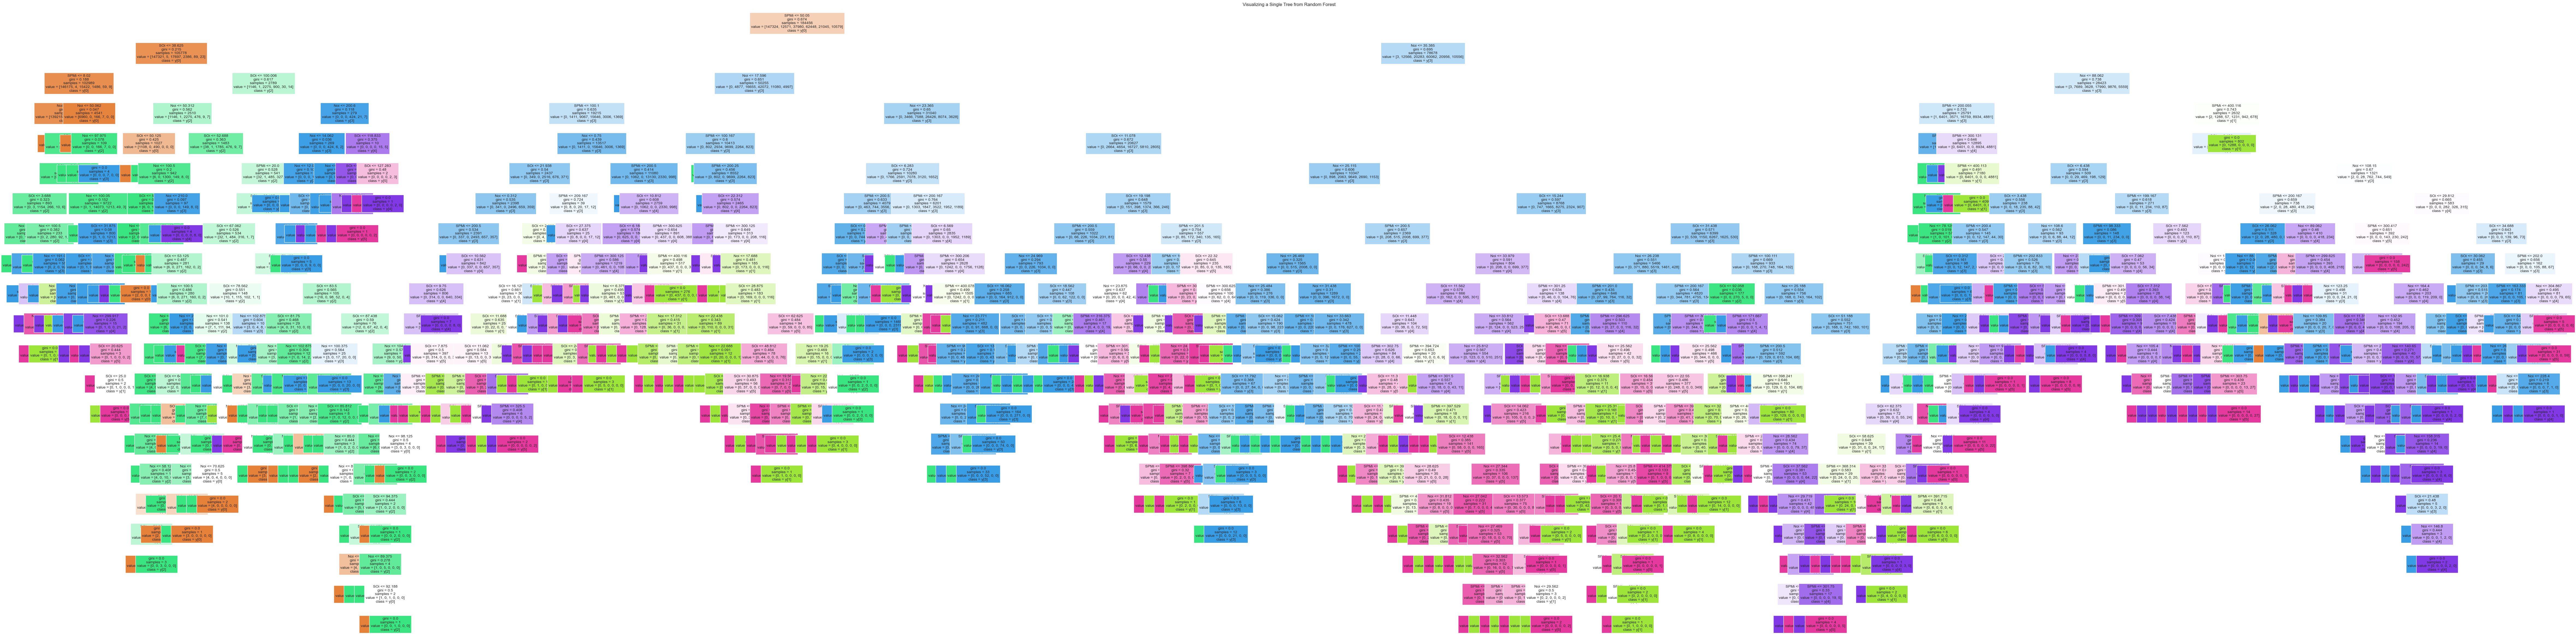

In [65]:
tree_in_forest = RF.estimators_[0]

# Visualize the tree
plt.figure(figsize=(120, 30))  # Set the size of the figure, adjust depending on the complexity of the tree
plot_tree(tree_in_forest, filled=True, feature_names=X_train2.columns, class_names=True, fontsize=10)
plt.title('Visualizing a Single Tree from Random Forest')
plt.show()

In [66]:
RF.predict([[7.4,47.7,78.182,100]])


array(['Moderate'], dtype=object)

In [67]:
RF.predict([[1,1.2,3.12,0]])


array(['Good'], dtype=object)

In [68]:
RF.predict([[325.7,345,798.182,203]])

array(['Very unhealthy'], dtype=object)

# K-Nearest Neighbours

In [69]:
#fit the model on train data 
KNN = KNeighborsClassifier().fit(X_train2,Y_train2)
#predict on train 
train_preds5 = KNN.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds5))

#predict on test
test_preds5 = KNN.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds5))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds5))

Model accuracy on train is:  0.998153774486465
Model accuracy on test is:  0.9967036405994645
--------------------------------------------------
KappaScore is:  0.995110229932413


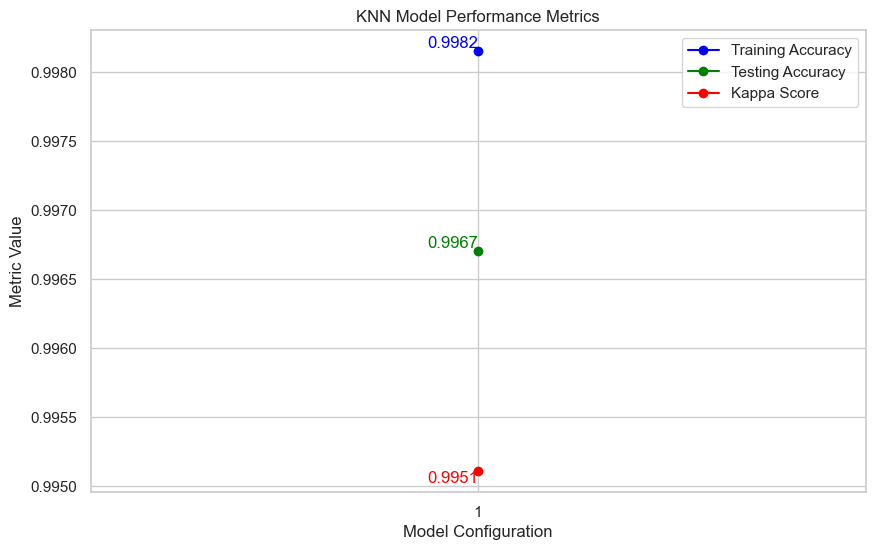

In [70]:
import matplotlib.pyplot as plt

# Actual measurement points
epochs = [1]  # One epoch or model configuration
accuracy_train = [0.998153774486465]  # Actual accuracy on training data
accuracy_test = [0.9967036405994645]  # Actual accuracy on testing data
kappa_scores = [0.995110229932413]  # Actual Kappa Score

# Creating the line plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy_train, label='Training Accuracy', marker='o', linestyle='-', color='blue')
plt.plot(epochs, accuracy_test, label='Testing Accuracy', marker='o', linestyle='-', color='green')
plt.plot(epochs, kappa_scores, label='Kappa Score', marker='o', linestyle='-', color='red')

plt.xticks(epochs)  # Ensure x-axis only shows available epoch
plt.xlabel('Model Configuration')
plt.ylabel('Metric Value')
plt.title('KNN Model Performance Metrics')
plt.legend()
plt.grid(True)  # Adding grid for better readability

# Adding text annotations directly to show values
plt.text(epochs[0], accuracy_train[0], f"{accuracy_train[0]:.4f}", ha='right', va='bottom', color='blue')
plt.text(epochs[0], accuracy_test[0], f"{accuracy_test[0]:.4f}", ha='right', va='bottom', color='green')
plt.text(epochs[0], kappa_scores[0], f"{kappa_scores[0]:.4f}", ha='right', va='top', color='red')

# Show the plot
plt.show()


In [71]:
KNN.predict([[7.4,47.7,78.182,100]]) 

array(['Poor'], dtype=object)

In [72]:
KNN.predict([[1,1.2,3.12,0]])

array(['Good'], dtype=object)

In [74]:
KNN.predict([[769.7,145,398.162,81]])

array(['Unhealthy'], dtype=object)